In [1]:
from PhaseEstimation import vqe, visualization as qplt, general as qmlgen

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

In [19]:
from cmath import phase


def phases_plot(size : int = 1000):
    xs = np.linspace(0,1,size)
    ys = np.linspace(0,2,size)

    phases = []
    for y in ys:
        for x in xs:
            if x <= .5:
                if y <= qmlgen.paraferro(x):
                    phases.append(0)
                else:
                    phases.append(1)
            else:
                if y <= qmlgen.paraanti(x):
                    phases.append(2)
                else:
                    phases.append(1)
    
    cmap = colors.ListedColormap(['palegreen', 'lightcoral', 'lightcoral'])
    bounds=[0,1,2,3]
    norm = colors.BoundaryNorm(bounds, cmap.N)


    plt.imshow(np.reshape(phases, (size,size)),origin='lower', cmap=cmap, norm = norm)
    #plt.colorbar()
    #plt.plot(np.linspace(size//2,size,size), qmlgen.paraanti(np.linspace(.5,1,size))*size//2, color = 'black', lw = .5)
    plt.plot(np.linspace(0,size//2,size), qmlgen.paraferro(np.linspace(0,.5,size))*size//2, color = 'black', lw = .5)
    plt.xlim(0,size)

    plt.ylabel(r"$h$", fontsize=18, color='red')
    plt.xlabel(r"$\kappa$", fontsize=18, color ='red')

    side = size
    x = np.linspace(1, 0, side)
    y = np.linspace(0, 2, side)

    plt.xticks(
        ticks=np.linspace(0, side - 1, 5).astype(int),
        labels=[np.round(k * 1 / 4, 2) for k in range(0, 5)],
        fontsize=13,
    )
    plt.yticks(
        ticks=np.linspace(0, side - 1, 5).astype(int),
        labels=[np.round(k * 2 / 4, 2) for k in range(0, 5)],
        fontsize=13,
    )
    #plt.text(int(0.8*size), int(0.1*size), 'Anti.', ha="center", va="center", fontsize = 14)
    #plt.text(int(0.2*size), int(0.1*size), 'Ferro.', ha="center", va="center", fontsize = 14)
    #plt.text(size//2,  int(0.6*size), 'Para.', ha="center", va="center", fontsize = 14)
    #plt.text(size//4,  int(0.35*size), r'$h_I$', ha="center", va="center", fontsize = 16)
    #plt.text(3*size//4,  int(0.28*size), r'$h_C$', ha="center", va="center", fontsize = 16)
    plt.text(int(0.2*size), int(0.1*size), 'Good\ncompression', ha="center", va="center", fontsize = 10)
    plt.text(int(0.6*size), int(0.6*size), 'Bad\ncompression', ha="center", va="center", fontsize = 10)

/home/saverio/Desktop/CERN/code/src/PhaseEstimation/general.py:188: RuntimeWarning: divide by zero encountered in double_scalars
  return ((1 - x) / x) * (1 - np.sqrt((1 - 3 * x + 4 * x * x) / (1 - x)))
/home/saverio/Desktop/CERN/code/src/PhaseEstimation/general.py:188: RuntimeWarning: invalid value encountered in double_scalars
  return ((1 - x) / x) * (1 - np.sqrt((1 - 3 * x + 4 * x * x) / (1 - x)))
/home/saverio/Desktop/CERN/code/src/PhaseEstimation/general.py:188: RuntimeWarning: divide by zero encountered in true_divide
  return ((1 - x) / x) * (1 - np.sqrt((1 - 3 * x + 4 * x * x) / (1 - x)))
/home/saverio/Desktop/CERN/code/qua/lib/python3.10/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning: invalid value encountered in multiply
  res = super().__array_ufunc__(ufunc, method, *args, **kwargs)


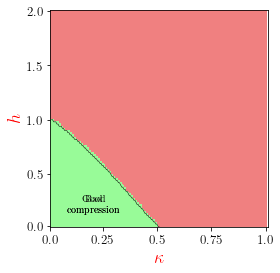

In [20]:
phases_plot(100)
plt.savefig('../data/plots/comp.png',  dpi=1000)